In [29]:
!nvidia-smi

Tue Aug 25 13:56:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 452.06       Driver Version: 452.06       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208... WDDM  | 00000000:01:00.0  On |                  N/A |
| 35%   58C    P2    62W / 250W |   6372MiB /  8192MiB |     46%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [7]:
import torch

state = torch.load("models_checkpoints/mobile_beauty_reduced/mobile_beauty_reduced__custom_mobilenetv2__epoch_1__val_acc_0.983_vs_0.983_val_loss_0.05_vs_0.05.pth", map_location='cpu')

from custom_models.mobilenet_v2_quantization import MobileNetV2Q

model = MobileNetV2Q().to('cpu')
model.eval()
model.fuse_model()
model.qconfig = torch.quantization.get_default_qat_qconfig('fbgemm')
torch.quantization.prepare_qat(model, inplace=True)
# torch.quantization.convert(model, inplace=True)

MobileNetV2Q(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): ConvReLU2d(
        3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
        (activation_post_process): FakeQuantize(
          fake_quant_enabled=tensor([1], dtype=torch.uint8), observer_enabled=tensor([1], dtype=torch.uint8),            scale=tensor([1.]), zero_point=tensor([0])
          (activation_post_process): MovingAverageMinMaxObserver(min_val=tensor([]), max_val=tensor([]))
        )
        (weight_fake_quant): FakeQuantize(
          fake_quant_enabled=tensor([1], dtype=torch.uint8), observer_enabled=tensor([1], dtype=torch.uint8),            scale=tensor([1.]), zero_point=tensor([0])
          (activation_post_process): MovingAveragePerChannelMinMaxObserver(min_val=tensor([]), max_val=tensor([]))
        )
      )
      (1): Identity()
      (2): Identity()
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): ConvReLU2d(
            32, 32, kernel_s

In [8]:
model.load_state_dict(state)

<All keys matched successfully>

In [9]:
model.apply(torch.quantization.disable_observer)
model.apply(torch.nn.intrinsic.qat.freeze_bn_stats)
print()

torch.quantization.convert(model.eval(), inplace=True)

model.eval()



torch.jit.save(torch.jit.script(model), "model_beauty_quantized_0825_1.pth")

In [27]:
model

MobileNetV2Q(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): ConvReLU2d(
        3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
        (activation_post_process): FakeQuantize(
          fake_quant_enabled=tensor([1], dtype=torch.uint8), observer_enabled=tensor([0], dtype=torch.uint8),            scale=tensor([0.0424]), zero_point=tensor([0])
          (activation_post_process): MovingAverageMinMaxObserver(min_val=0.0, max_val=5.386950492858887)
        )
        (weight_fake_quant): FakeQuantize(
          fake_quant_enabled=tensor([1], dtype=torch.uint8), observer_enabled=tensor([0], dtype=torch.uint8),            scale=tensor([4.0668e-05, 3.9361e-03, 4.1056e-03, 4.6347e-03, 2.4824e-04, 4.9580e-04,
                  1.7208e-03, 4.5036e-04, 1.2939e-03, 7.7423e-06, 1.2949e-03, 2.0977e-04,
                  3.5090e-03, 1.0141e-03, 1.1959e-05, 1.0787e-05, 3.2617e-05, 4.7987e-06,
                  1.6428e-04, 9.3838e-04, 7.1787e-04, 7.5799e-04, 2.0526e-03, 6.3508e-06,

In [1]:
import pandas as pd

In [2]:
path = 'csvs/mobile_beauty_reduced.csv'
df = pd.read_csv(path)

In [7]:
path = 'csvs/mobile_premium_hard.csv'

In [8]:
df = pd.read_csv(path)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df = df[df.url.str.len() > 20]

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df['name'] = df.index

In [12]:
df['name'] = df['name'].astype('str') + '.jpg'

In [13]:
df

,Unnamed: 0,Unnamed: 0.1,text,url,src,label,name
0,0,0.0,This next awesome portrait comes from the tale...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/portraitmeet/,1,0.jpg
1,1,1.0,This beautiful shot of @molanbe has been captu...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/portraitmeet/,1,1.jpg
2,2,2.0,Thanks to everyone who came out Sunday night! ...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/portraitmeet/,1,2.jpg
3,3,3.0,"Our friend, @snaps_by_icy, is going full speed...",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/portraitmeet/,1,3.jpg
4,4,4.0,Today's awesome photo comes from @chriszranche...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/portraitmeet/,1,4.jpg
5,5,5.0,"Photo by PortraitMeet™ in Los Angeles, Califor...",https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/portraitmeet/,1,5.jpg
6,6,6.0,This awesome portrait of @carmenperuzzini is c...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/portraitmeet/,1,6.jpg
7,7,7.0,PortraitMeet was well represented at last mont...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/portraitmeet/,1,7.jpg
8,8,8.0,This beautiful portrait was shot by the talent...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/portraitmeet/,1,8.jpg
9,9,9.0,This amazing portrait of @solaeva has been cap...,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,https://www.instagram.com/portraitmeet/,1,9.jpg


In [14]:
df.to_csv(path)

In [11]:
from load_pictures import skip_loaded_urls

In [29]:
u = skip_loaded_urls(df, 'storages/approve_adult_299x299/', overwrite=False)

storage exists, len (368464)
already_loaded_names len 368464
withput loaded names len 678


In [30]:
len(u)

678

In [31]:
from PIL import Image
from tqdm import tqdm

In [32]:
to_del = []

In [33]:
for index, row in tqdm(df.iterrows(), total=len(df)):
    try:
        Image.open(f'storages/approve_adult_299x299/{row["name"]}')
    except:
        to_del.append(row['name'])

100%|██████████| 356085/356085 [01:32<00:00, 3862.50it/s]


In [34]:
len(to_del)

678

In [35]:
df = df[~df.name.isin(to_del)]

In [36]:
df.to_csv(path)

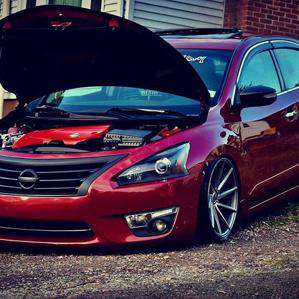

In [39]:
Image.open('storages/unpersonal_299x299/113401.jpg')

In [42]:
df[df.name.str.contains("113401")].url.values

array(['https://instagram.fhrk1-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c180.0.719.719a/s640x640/106398227_601880610738207_8196751146206650093_n.jpg?_nc_ht=instagram.fhrk1-1.fna.fbcdn.net&_nc_cat=103&_nc_ohc=dG7M4XpMahUAX-CugC6&oh=4b170b5ef969288698ebc934d38732a2&oe=5F24780A'],
      dtype=object)

In [8]:
df = df[df.url.str.len() > 20]

In [10]:
df.to_csv(path)

In [20]:
df.rename(columns={"url" : 'u', 'name' : "n"})[['u', 'n']]

,u,n
0,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,0.jpg
1,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,1.jpg
2,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,2.jpg
3,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,3.jpg
4,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,4.jpg
5,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,5.jpg
6,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,6.jpg
7,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,7.jpg
8,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,8.jpg
9,https://instagram.fhrk1-1.fna.fbcdn.net/v/t51....,9.jpg


In [21]:
s = _.to_dict(orient='records')

In [30]:
import requests
r = requests.get(s[2]['u'])

In [9]:
df.url[0]

'https://instagram.fhrk1-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.135.1080.1080a/s640x640/26065870_762077420643781_6593846093052641280_n.jpg?_nc_ht=instagram.fhrk1-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=nesxW5RkhlAAX_S5D9P&oh=8dc15f70803292a0980a852546a0c3aa&oe=5EF6084F'

In [1]:
from dataset_hdf5 import HDF5Dataset
from augmentation import *
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

In [2]:

dataset = HDF5Dataset('storages/ER_prediction_600x600/', pd.read_csv('csvs/portraits_vs_bad_more_test.csv'), transform=None)

In [3]:
from torchvision.transforms import ToPILImage

In [4]:
test = pd.read_csv('csvs/portraits_vs_bad_more_test.csv')
train = pd.read_csv('csvs/portraits_vs_bad_more_train.csv')

In [5]:
import seaborn as sns

In [6]:
dataset[0][0].size()

torch.Size([600, 600, 3])

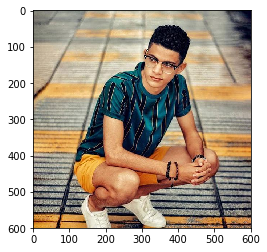

In [14]:
plt.imshow(dataset[101][0].numpy().astype('int'))

In [17]:
test.loc[101, 'url']

'https://instagram.fhrk1-1.fna.fbcdn.net/v/t51.2885-15/sh0.08/e35/c0.113.932.932a/s640x640/18514167_1556655727701752_6194709529490358272_n.jpg?_nc_ht=instagram.fhrk1-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=5S7KbknatK0AX9TucL0&oh=6c7beb9cc2d72c7bf27a0ab2c7f93871&oe=5EF966E2'

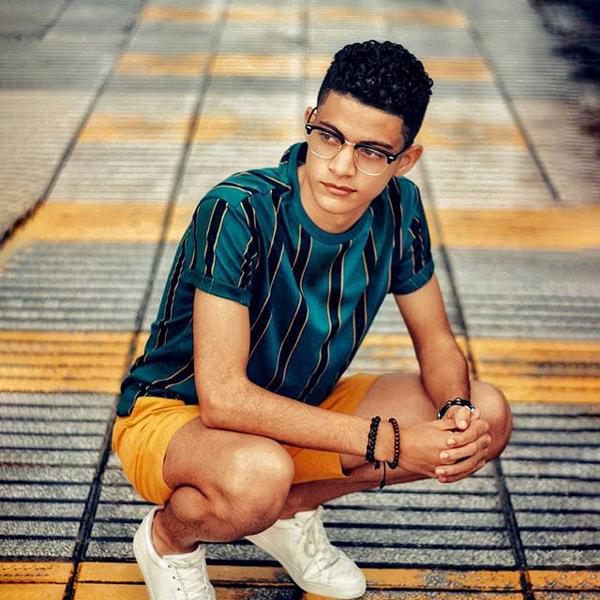

In [16]:
Image.open('storages/ER_prediction_600x600/22604.jpg')